In [ ]:
# This notebook presents a preview of Christine Mundiya’s AI housing forecast tool.
# It includes time-series modeling (Prophet, ARIMA), basic neural network predictions, and real-time experimentation with public datasets.

#AI Housing Forecast Prototype — Progress Snapshot for USCIS

In [1]:
from google.colab import files
uploaded = files.upload()



Saving Zillow Dataset.csv to Zillow Dataset (2).csv


In [2]:
import pandas as pd

# Loading 500 rows to preview
zillow_df = pd.read_csv('Zillow Dataset.csv', nrows=500)

# Previewing
zillow_df.head()


,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2015-01-31,...,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28,2025-03-31
0,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,1508.360839,...,1944.594609,1948.743105,1959.220628,1948.839029,1938.950129,1931.732915,1927.473765,1925.058141,1923.777325,1934.187197
1,91940,3,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,1278.198997,...,1861.848933,1876.424247,1888.347827,1866.381759,1847.803783,1844.554993,1864.335907,1874.742541,1887.575244,1899.207483
2,91733,5,77084,zip,TX,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,1223.581836,...,1814.568276,1818.540425,1816.728734,1819.280433,1824.685102,1820.031417,1808.193630,1785.807537,1801.010284,1799.690799
3,93144,6,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,NaN,...,1454.355246,1467.620876,1459.493583,1452.167255,1436.799034,1443.458036,1457.229396,1486.121034,1504.990133,1499.725504
4,62093,7,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,NaN,...,2898.042277,2956.641639,2951.236587,2917.331641,2872.731610,2825.975389,2804.405018,2848.535701,2885.208900,2938.048846


In [3]:
# Droping columns that are completely null
zillow_df = zillow_df.dropna(axis=1, how='all')


In [4]:
# Identifying rent columns (monthly values from 2015–2025)
rent_columns = zillow_df.columns[ zillow_df.columns.str.contains('20') ]

# Filtering for Washington, D.C. sample (can swap for any city)
dc_sample = zillow_df[zillow_df['City'] == 'Washington'].copy()

# Melting into time-series format
dc_melted = dc_sample.melt(id_vars=['RegionID', 'City'],
                           value_vars=rent_columns,
                           var_name='ds', value_name='y')

# Droping missing values
dc_melted.dropna(subset=['y'], inplace=True)

# Converting to datetime
dc_melted['ds'] = pd.to_datetime(dc_melted['ds'])

# Previewing
dc_melted.head()


,RegionID,City,ds,y
0,66126,Washington,2015-01-31,1631.463345
3,66126,Washington,2015-02-28,1614.338718
6,66126,Washington,2015-03-31,1634.608218
9,66126,Washington,2015-04-30,1676.544932
12,66126,Washington,2015-05-31,1699.331116


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2aq3jynp/mri5ml8a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2aq3jynp/yvxwrcne.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90224', 'data', 'file=/tmp/tmp2aq3jynp/mri5ml8a.json', 'init=/tmp/tmp2aq3jynp/yvxwrcne.json', 'output', 'file=/tmp/tmp2aq3jynp/prophet_modelb0xa17m8/prophet_model-20250505030439.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:04:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:04:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


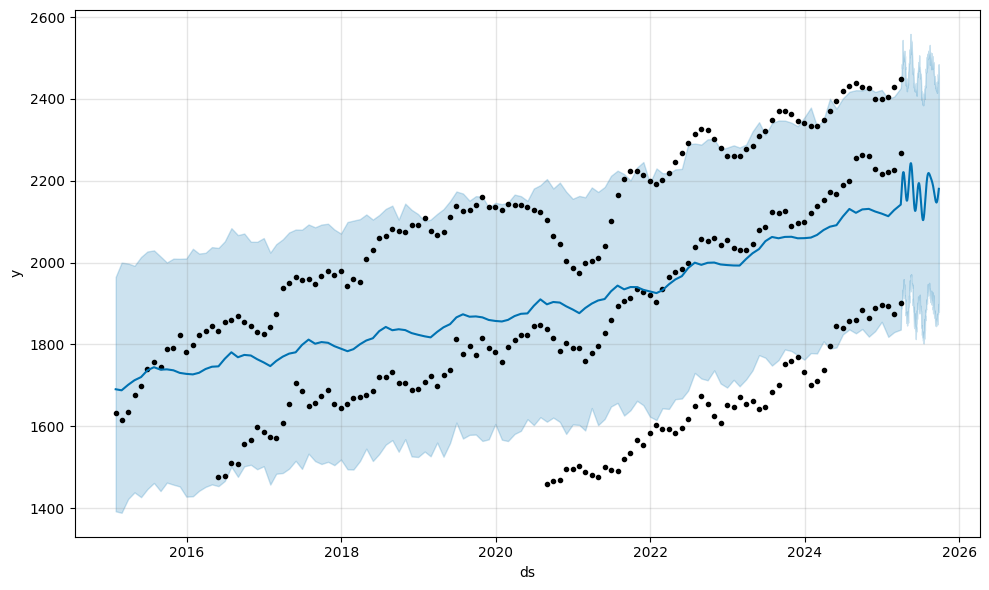

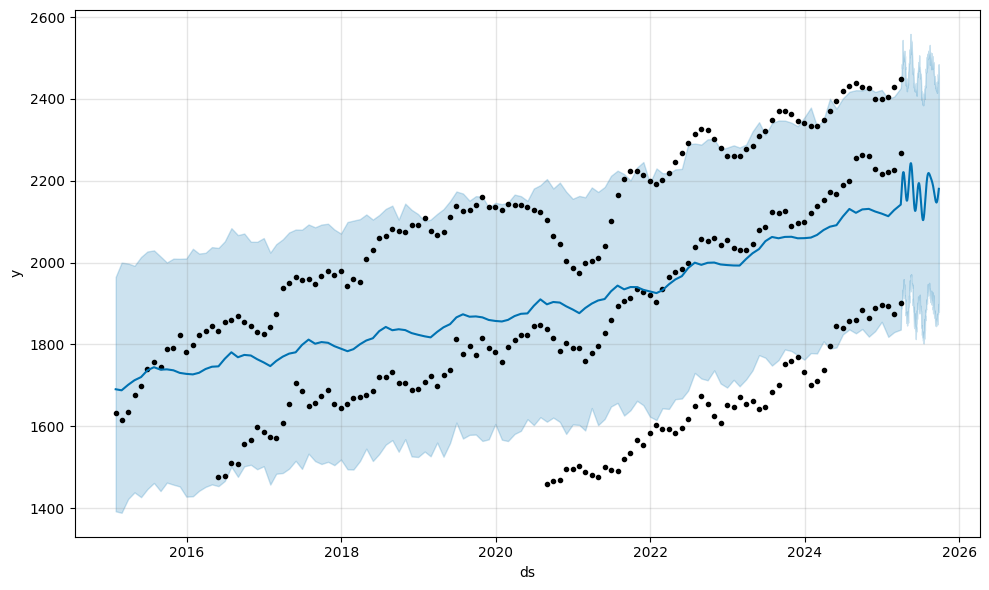

In [15]:
#PROPHET
#This chart shows the predicted rent trends using Prophet.

# Installing Prophet
!pip install prophet

from prophet import Prophet

# Training the model
model = Prophet()
model.fit(dc_melted)

# Forecasting 6 months ahead
future = model.make_future_dataframe(periods=180)
forecast = model.predict(future)

# Ploting forecast
model.plot(forecast)



In [16]:
#ARIMA

#The following chart illustrates ARIMA's rent prediction with confidence intervals.

!pip install statsmodels --quiet

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


In [17]:
# Extracting one ZIP's data
zip_data = zillow_df[zillow_df['RegionName'] == 77494]  # example ZIP code
zip_series = zip_data.loc[:, '2015-01-31':].T
zip_series.columns = ['Rent']
zip_series.index = pd.to_datetime(zip_series.index)


In [18]:
# Fitting ARIMA (The order can be tuned; here I am using (1,1,1) as a basic example)
model = ARIMA(zip_series, order=(1, 1, 1))
model_fit = model.fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


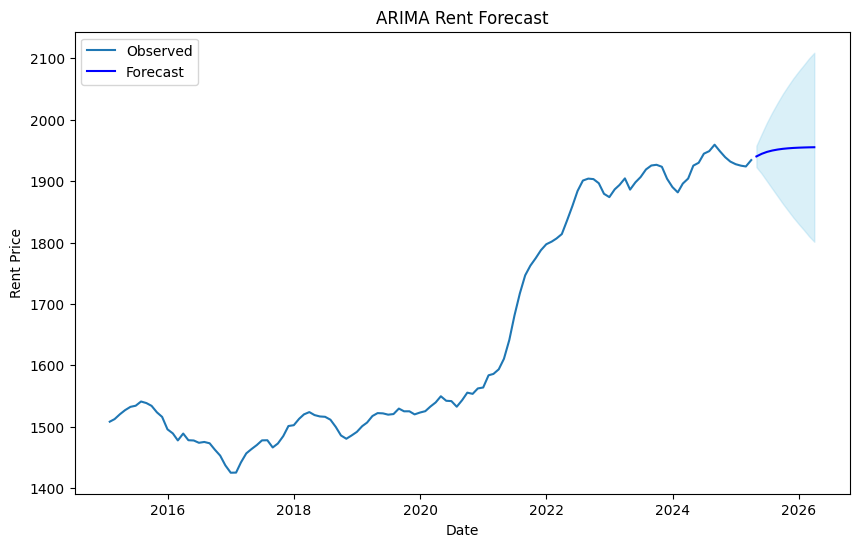

In [19]:
# Forecasting next 12 months
forecast = model_fit.get_forecast(steps=12)
forecast_df = forecast.summary_frame()

# Plotting results
plt.figure(figsize=(10, 6))
plt.plot(zip_series, label='Observed')
plt.plot(forecast_df['mean'], label='Forecast', color='blue')
plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color='skyblue', alpha=0.3)
plt.title('ARIMA Rent Forecast')
plt.xlabel('Date')
plt.ylabel('Rent Price')
plt.legend()
plt.show()


In [20]:
# NEURAL NETWORK FORECASTING

#Neural network model (basic) performance on rent prediction.

import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt




/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


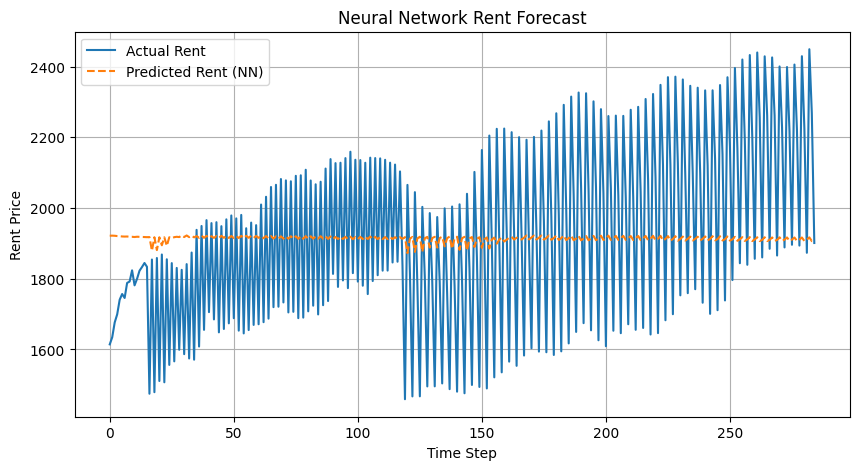

In [21]:
# Preparing the dataset
rent_series = dc_melted['y'].values.reshape(-1, 1)

# Normalizing
scaler = MinMaxScaler()
rent_scaled = scaler.fit_transform(rent_series)

# Creating input/output pairs
X = rent_scaled[:-1]
y = rent_scaled[1:]

# Building a simple NN model
model_nn = Sequential()
model_nn.add(Dense(32, input_dim=1, activation='relu'))
model_nn.add(Dense(1))
model_nn.compile(optimizer='adam', loss='mse')

# Training
model_nn.fit(X, y, epochs=50, verbose=0)

# Predicting
predicted = model_nn.predict(X)
actual = scaler.inverse_transform(y)
forecast = scaler.inverse_transform(predicted)

# Plotting
plt.figure(figsize=(10,5))
plt.plot(actual, label='Actual Rent')
plt.plot(forecast, label='Predicted Rent (NN)', linestyle='dashed')
plt.title('Neural Network Rent Forecast')
plt.xlabel('Time Step')
plt.ylabel('Rent Price')
plt.legend()
plt.grid(True)
plt.show()


# AI Housing Forecasting Tool — Sample Output for USCIS
Christine Mundiya | May 2025
